# Feed Forward for regression

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [2]:

df = pd.read_csv('Data/house-prices-advanced-regression-techniques/train.csv')  


In [3]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.shape

(1460, 81)

In [6]:
# put of 80 we have 38 columns 
df.describe().shape

(8, 38)

In [7]:
for i in df.columns:
    print(f'{i}:{df[i].isnull().sum()}')

Id:0
MSSubClass:0
MSZoning:0
LotFrontage:259
LotArea:0
Street:0
Alley:1369
LotShape:0
LandContour:0
Utilities:0
LotConfig:0
LandSlope:0
Neighborhood:0
Condition1:0
Condition2:0
BldgType:0
HouseStyle:0
OverallQual:0
OverallCond:0
YearBuilt:0
YearRemodAdd:0
RoofStyle:0
RoofMatl:0
Exterior1st:0
Exterior2nd:0
MasVnrType:872
MasVnrArea:8
ExterQual:0
ExterCond:0
Foundation:0
BsmtQual:37
BsmtCond:37
BsmtExposure:38
BsmtFinType1:37
BsmtFinSF1:0
BsmtFinType2:38
BsmtFinSF2:0
BsmtUnfSF:0
TotalBsmtSF:0
Heating:0
HeatingQC:0
CentralAir:0
Electrical:1
1stFlrSF:0
2ndFlrSF:0
LowQualFinSF:0
GrLivArea:0
BsmtFullBath:0
BsmtHalfBath:0
FullBath:0
HalfBath:0
BedroomAbvGr:0
KitchenAbvGr:0
KitchenQual:0
TotRmsAbvGrd:0
Functional:0
Fireplaces:0
FireplaceQu:690
GarageType:81
GarageYrBlt:81
GarageFinish:81
GarageCars:0
GarageArea:0
GarageQual:81
GarageCond:81
PavedDrive:0
WoodDeckSF:0
OpenPorchSF:0
EnclosedPorch:0
3SsnPorch:0
ScreenPorch:0
PoolArea:0
PoolQC:1453
Fence:1179
MiscFeature:1406
MiscVal:0
MoSold:0
YrS

In [8]:
# Checking for the missing values in percentage
cols_to_check = [
    "LotFrontage", "Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure",
    "BsmtFinType1", "Electrical", "FireplaceQu", "GarageType", "GarageYrBlt",
    "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature", "Electrical",
    "BsmtFinType2"
]

missing_percent = df[cols_to_check].isnull().mean() * 100
missing_percent = missing_percent.sort_values(ascending=False)

print(missing_percent)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageFinish     5.547945
GarageCond       5.547945
GarageQual       5.547945
GarageType       5.547945
GarageYrBlt      5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
Electrical       0.068493
Electrical       0.068493
dtype: float64


In [9]:
# Removing the columns which have missing values more than 75%
df.drop(columns = ['PoolQC', 'MiscFeature', 'Alley', 'Fence'], inplace = True)

In [10]:
# df['MasVnrType'] = df['MasVnrType'].fillna('MasVnrType').mode()[0]

In [11]:
# df['FireplaceQu'] = df['FireplaceQu'].fillna('MasVnrType').mode()[0]

In [12]:
y = df['SalePrice']
X = df.drop(['SalePrice', 'Id'], axis=1)

In [13]:
!pip install plotly


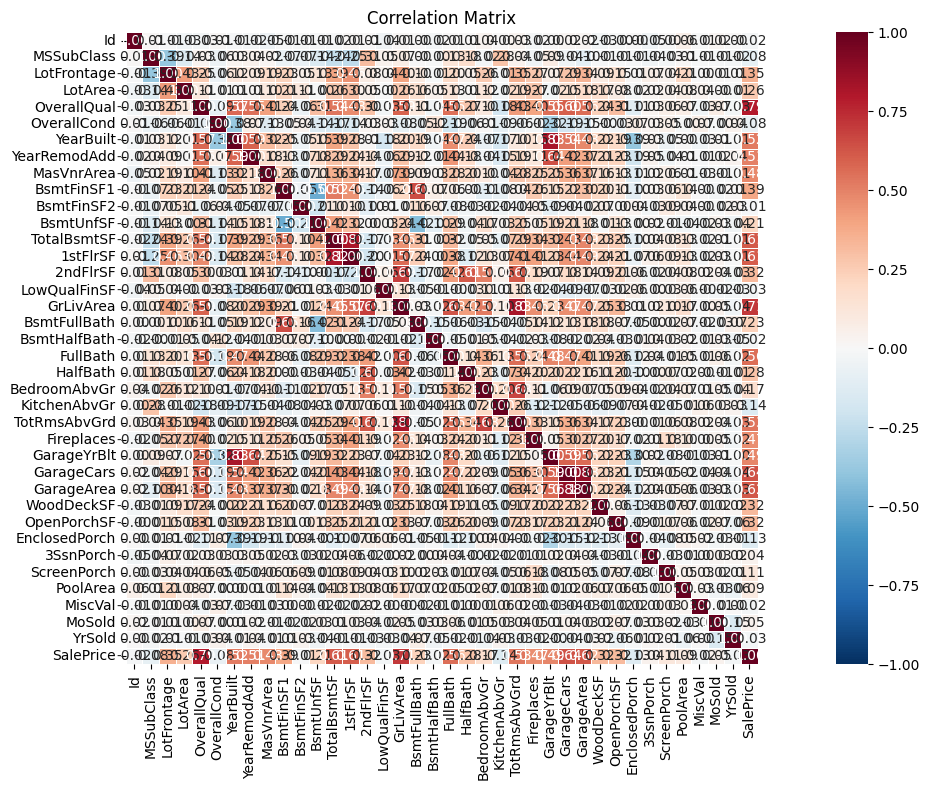

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Feature selection by correlation matrix
num_cols = df.select_dtypes(include='number')
corr = num_cols.corr()

plt.figure(figsize=(16, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='RdBu_r', vmin=-1, vmax=1, square=True, linewidths=0.5)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


In [15]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)]
)

X_processed = preprocessor.fit_transform(X)
X_processed = X_processed.toarray() ## because it returns scipy.sparse._csr.csr_matrix

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)


In [52]:
X_processed

array([[ 0.07337496, -0.22087509, -0.20714171, ...,  0.        ,
         1.        ,  0.        ],
       [-0.87256276,  0.46031974, -0.09188637, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.07337496, -0.08463612,  0.07347998, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.30985939, -0.1754621 , -0.14781027, ...,  0.        ,
         1.        ,  0.        ],
       [-0.87256276, -0.08463612, -0.08016039, ...,  0.        ,
         1.        ,  0.        ],
       [-0.87256276,  0.23325479, -0.05811155, ...,  0.        ,
         1.        ,  0.        ]])

In [53]:
type(X_processed)

numpy.ndarray

In [55]:
from tensorflow.keras import regularizers

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dense(1)
])


In [56]:
X_processed

array([[ 0.07337496, -0.22087509, -0.20714171, ...,  0.        ,
         1.        ,  0.        ],
       [-0.87256276,  0.46031974, -0.09188637, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.07337496, -0.08463612,  0.07347998, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.30985939, -0.1754621 , -0.14781027, ...,  0.        ,
         1.        ,  0.        ],
       [-0.87256276, -0.08463612, -0.08016039, ...,  0.        ,
         1.        ,  0.        ],
       [-0.87256276,  0.23325479, -0.05811155, ...,  0.        ,
         1.        ,  0.        ]])

In [57]:
callback = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)


In [58]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=500, batch_size=32,
                    validation_split=0.1, verbose=1,callbacks=callback)
    

Epoch 1/500
33/33 [==============================] - 1s 9ms/step - loss: 38749478912.0000 - mae: 181000.0000 - val_loss: 39997300736.0000 - val_mae: 185120.1094
Epoch 2/500
33/33 [==============================] - 0s 5ms/step - loss: 38528466944.0000 - mae: 180422.8438 - val_loss: 39334146048.0000 - val_mae: 183424.7812
Epoch 3/500
33/33 [==============================] - 0s 5ms/step - loss: 36624805888.0000 - mae: 175465.4844 - val_loss: 35303104512.0000 - val_mae: 172829.3438
Epoch 4/500
33/33 [==============================] - 0s 5ms/step - loss: 29223446528.0000 - mae: 154456.7500 - val_loss: 23224041472.0000 - val_mae: 136524.2969
Epoch 5/500
33/33 [==============================] - 0s 5ms/step - loss: 14354583552.0000 - mae: 99356.3984 - val_loss: 6599651840.0000 - val_mae: 60399.4414
Epoch 6/500
33/33 [==============================] - 0s 5ms/step - loss: 3232466944.0000 - mae: 35695.8867 - val_loss: 1941101824.0000 - val_mae: 31429.2891
Epoch 7/500
33/33 [======================

In [59]:
loss, mae = model.evaluate(X_test, y_test, verbose=1)
print(f'Test MAE: {mae:.2f}')


10/10 [==============================] - 0s 3ms/step - loss: 942546944.0000 - mae: 18300.2246
Test MAE: 18300.22


In [60]:
predictions = model.predict(X_test[:5])
print(predictions.flatten())


1/1 [==============================] - 0s 57ms/step
[156038.31  329370.5    95364.695 173611.34  339765.7  ]


In [61]:
from sklearn.metrics import mean_absolute_percentage_error


y_pred = model.predict(X_test)

mape = mean_absolute_percentage_error(y_test, y_pred) * 100
print(f"Model is off by {mape:.2f}% on average.")


 1/10 [==>...........................] - ETA: 0s

10/10 [==============================] - 0s 2ms/step
Model is off by 11.13% on average.


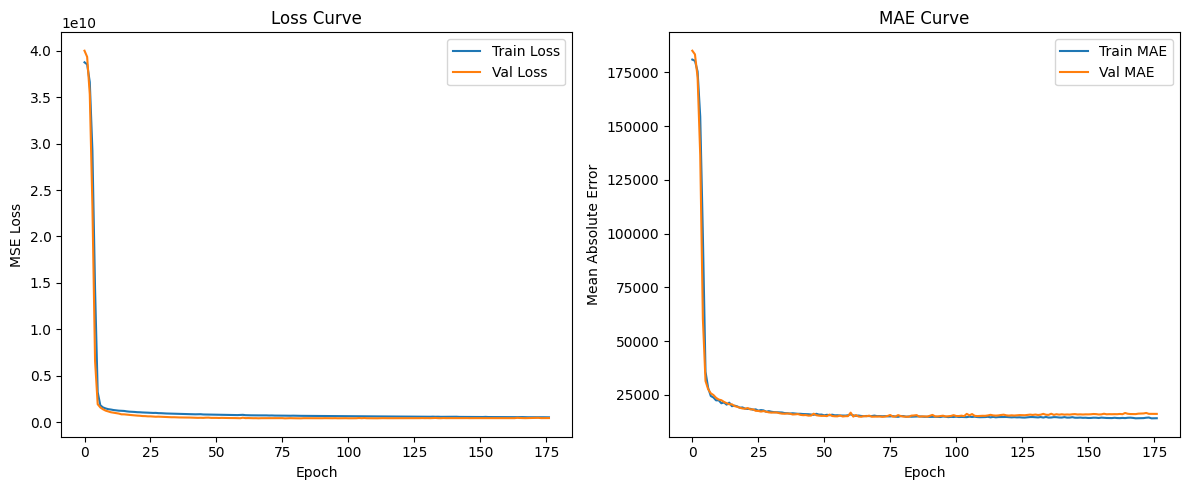

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()

if 'mae' in history.history:
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Train MAE')
    plt.plot(history.history['val_mae'], label='Val MAE')
    plt.title('MAE Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Error')
    plt.legend()

plt.tight_layout()
plt.show()


# Feed Forward for Classfication

In [63]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay)
import matplotlib.pyplot as plt

In [ ]:
data = load_breast_cancer()
X, y = data.data, data.target 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [65]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') 
])


In [67]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [68]:

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    verbose=0
)


In [69]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.9561


In [70]:
y_pred_probs = model.predict(X_test).flatten()
y_pred = (y_pred_probs > 0.5).astype(int)

4/4 [==============================] - 0s 1ms/step


In [71]:
print("\nClassification Report:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred):.4f}")


Classification Report:
Accuracy:  0.9561
Precision: 0.9855
Recall:    0.9444
F1 Score:  0.9645


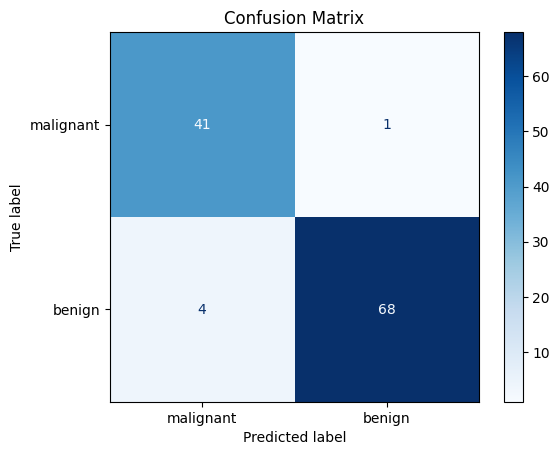

In [72]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


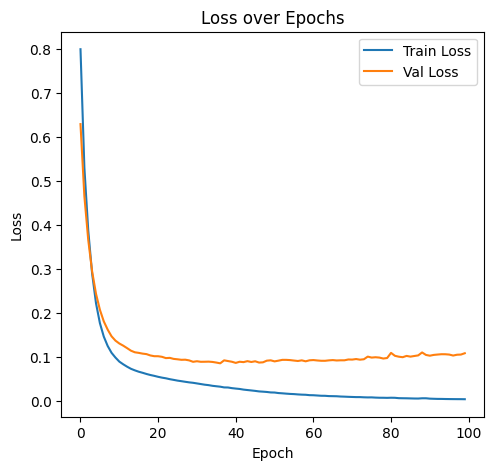

In [78]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend()

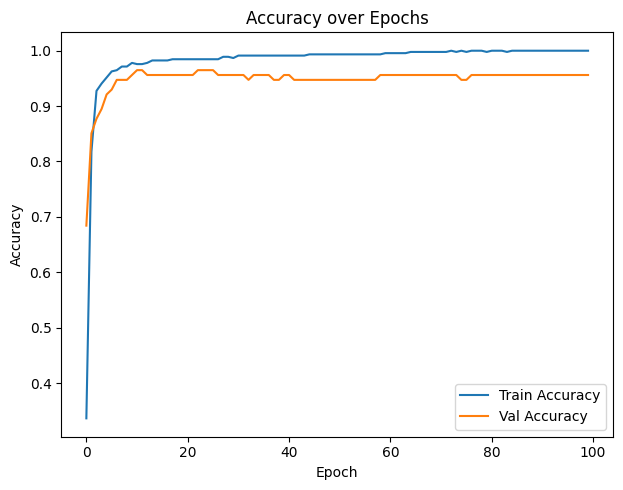

In [79]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Val Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs")
plt.legend()

plt.tight_layout()
plt.show()
